# (2) Project 4 - EDA

---
I have previously scraped job listings data from au.indeed.com. I will now do EDA to clean, plot, and analyse the data.

---

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('indeed_jobs.csv')

In [3]:
df.head()

,location,title,company,salary,summary,description
0,Sydney NSW,Junior Data Analyst/Scientist,International Institute of Data & Analytics,NaN,In data science and big data anal...,The International Institute of Data & Analyti...
1,Sydney NSW,Senior Data Scientist,Amazon.com,NaN,A Senior Data Scientist will:. Ou...,Excited by using massive amounts of data to d...
2,Sydney NSW,Research Scientist,Amazon.com,NaN,Data drives the development of new process; D...,Business today operates at the pinnacle of th...
3,Macquarie University NSW,Data Science Research Engineer,Macquarie University,"$100,706 - $112,058 a year",We are seeking a Data Science Res...,NaN
4,Sydney NSW,Data Scientist (Sydney),C3 IoT,NaN,"In this capacity, you will partic...","In this capacity, you will participate in the..."


In [4]:
df.shape

(4405, 6)

---
I will start by cleaning the data.

---

## Cleaning

In [5]:
df.isnull().sum()

location          0
title             0
company           3
salary         3560
summary           0
description      30
dtype: int64

---
I first checked how many null values are in each column. Most of the salary records are NaN. However, I will leave these in place for now as I will be making a model to predict and impute these values based on the salaries that are in the data.
<br>The company and description columns have a few NaNs so I will remove these rows.

---

In [6]:
df.dropna(subset=['location', 'title', 'company', 'summary', 'description'], axis=0, inplace=True)
# drop NaNs from all columns except salary.

In [7]:
df.head()

,location,title,company,salary,summary,description
0,Sydney NSW,Junior Data Analyst/Scientist,International Institute of Data & Analytics,NaN,In data science and big data anal...,The International Institute of Data & Analyti...
1,Sydney NSW,Senior Data Scientist,Amazon.com,NaN,A Senior Data Scientist will:. Ou...,Excited by using massive amounts of data to d...
2,Sydney NSW,Research Scientist,Amazon.com,NaN,Data drives the development of new process; D...,Business today operates at the pinnacle of th...
4,Sydney NSW,Data Scientist (Sydney),C3 IoT,NaN,"In this capacity, you will partic...","In this capacity, you will participate in the..."
5,Sydney NSW,Data Scientist,BuildingIQ,NaN,We are looking for a Data Scienti...,"Job Description | Location – Sydney, Australi..."


In [8]:
df.shape

(4372, 6)

In [9]:
df.isnull().sum()

location          0
title             0
company           0
salary         3534
summary           0
description       0
dtype: int64

---
Having previously checked the csv file in excel, I have noticed that a number of the records appear to have white space at the beginning so I will use .strip to remove it. There are also a variety of symbols in the text in the columns that will need to be removed to clean the data.

---

In [10]:
df["summary"] = df["summary"].map(str.strip)   # Remove white space from the beginning of rows.
df["location"] = df["location"].map(str.strip)
df["title"] = df["title"].map(str.strip)
df["company"] = df["company"].map(str.strip)
df["description"] = df["description"].map(str.strip)

In [11]:
df.head()

,location,title,company,salary,summary,description
0,Sydney NSW,Junior Data Analyst/Scientist,International Institute of Data & Analytics,NaN,"In data science and big data analytics, the ID...",The International Institute of Data & Analytic...
1,Sydney NSW,Senior Data Scientist,Amazon.com,NaN,A Senior Data Scientist will:. Our Data Scient...,Excited by using massive amounts of data to de...
2,Sydney NSW,Research Scientist,Amazon.com,NaN,Data drives the development of new process; Da...,Business today operates at the pinnacle of the...
4,Sydney NSW,Data Scientist (Sydney),C3 IoT,NaN,"In this capacity, you will participate in the ...","In this capacity, you will participate in the ..."
5,Sydney NSW,Data Scientist,BuildingIQ,NaN,We are looking for a Data Scientist to be a pa...,"Job Description | Location – Sydney, Australia..."


---
The following function will clean the data for a column by removing a number of symbols that I have noticed were in the data.

---

In [12]:
def clean_data(df, column):
    cleaning_list = ['+', '$', '/', ',', '?', '.', ';', '-', '@', '!', '&', '%', '^', '*', ')', '(', '|', '<', '>',
                     '"', ':', '‚', 'Ä', 'ô', 'ì']  # List of symbols to be removed.
    for item in cleaning_list:
        df[column] = df[column].str.replace(item, ' ')  # replace any symbol found in a column with a space.
        df[column] = df[column].map(str.lower)    # make the text in columns lowercase.

In [13]:
clean_data(df, 'location')   # Call clean_data function for all columns except salary which will be cleaned separately.
clean_data(df, 'title')
clean_data(df, 'company')
clean_data(df, 'summary')
clean_data(df, 'description')

In [14]:
df.head()

,location,title,company,salary,summary,description
0,sydney nsw,junior data analyst scientist,international institute of data analytics,NaN,in data science and big data analytics the id...,the international institute of data analytic...
1,sydney nsw,senior data scientist,amazon com,NaN,a senior data scientist will our data scient...,excited by using massive amounts of data to de...
2,sydney nsw,research scientist,amazon com,NaN,data drives the development of new process da...,business today operates at the pinnacle of the...
4,sydney nsw,data scientist sydney,c3 iot,NaN,in this capacity you will participate in the ...,in this capacity you will participate in the ...
5,sydney nsw,data scientist,buildingiq,NaN,we are looking for a data scientist to be a pa...,job description location – sydney australia...


### Salary

---
The salary data needs cleaning.

---

In [15]:
df.salary.value_counts()

                 $120,000 a year               25
                 $100,000 - $120,000 a year    23
                 $110,000 a year               17
                 $100,000 a year               17
                 $140,000 a year               14
                 $90,000 a year                12
                 $60,000 - $70,000 a year      10
                 $80,000 - $100,000 a year     10
                 $110,000 - $120,000 a year    10
                 $130,000 a year               10
                 $70,000 - $80,000 a year      10
                 $120,000 - $140,000 a year    10
                 $80,000 - $85,000 a year       9
                 $120,000 - $130,000 a year     9
                 $75,000 a year                 9
                 $85,000 a year                 9
                 $80,000 - $90,000 a year       9
                 $90,000 - $100,000 a year      9
                 $93,867 - $113,572 a year      9
                 $150,000 a year                8


---
Checking the value_counts, there are dollar signs ($) and commas (,) that need to be removed. The salary data is also split into different periods, such as per year, per week, and per hour. This will also need to cleaned. I will then scale non-annual salaries to an annual pay scale.

---

In [16]:
df['salary'] = df['salary'].str.replace(',', '')   # Remove ',' and '$' from salary data.
df['salary'] = df['salary'].str.replace('$', '')

---
I will create another column, salary_type, to record whether the listed salary is yearly, hourly, etc. This will allow me to scale all salaries to an annual rate and see the distributions of the salary records for each salary type.

---

In [17]:
df['salary'] = df['salary'].map(lambda x: str(x))   # Make salary column string type so I can use string lambda functions.

In [18]:
df.salary.isnull().sum()

0

In [19]:
df['salary_type'] = df['salary']   # Create salary_type column from salary column.

In [20]:
# Change records in salary_type column to match the salary type, e.g. make record 'year' if 'year' is in the record.
df['salary_type'] = df['salary_type'].map(lambda x: 'year' if 'year' in x else x)
df['salary_type'] = df['salary_type'].map(lambda x: 'month' if 'month' in x else x)
df['salary_type'] = df['salary_type'].map(lambda x: 'week' if 'week' in x else x)
df['salary_type'] = df['salary_type'].map(lambda x: 'day' if 'day' in x else x)
df['salary_type'] = df['salary_type'].map(lambda x: 'hour' if 'hour' in x else x)

In [21]:
df.head()

,location,title,company,salary,summary,description,salary_type
0,sydney nsw,junior data analyst scientist,international institute of data analytics,nan,in data science and big data analytics the id...,the international institute of data analytic...,nan
1,sydney nsw,senior data scientist,amazon com,nan,a senior data scientist will our data scient...,excited by using massive amounts of data to de...,nan
2,sydney nsw,research scientist,amazon com,nan,data drives the development of new process da...,business today operates at the pinnacle of the...,nan
4,sydney nsw,data scientist sydney,c3 iot,nan,in this capacity you will participate in the ...,in this capacity you will participate in the ...,nan
5,sydney nsw,data scientist,buildingiq,nan,we are looking for a data scientist to be a pa...,job description location – sydney australia...,nan


---
I will now create separate dataframes for the different salary periods (including one for the NaNs). This will allow me to separately scale the different periods to an annual salary and then concatonate the scaled dataframes.

---

In [22]:
year_salaries = df[df['salary'].str.contains('year')]   # Yearly salary datframe for records with an annual salary.
month_salaries = df[df['salary'].str.contains('month')]
week_salaries = df[df['salary'].str.contains('week')]
day_salaries = df[df['salary'].str.contains('day')]
hour_salaries = df[df['salary'].str.contains('hour')]
nan_salaries = df[df['salary'].str.contains('nan')]   # Create NaN dataframe to later concatonate with other dataframes containing salaries.

---
Now that the different salary types are in separate dataframes, I can individually clean each one.

---

In [23]:
# Remove the type (e.g. ' a year') from the data.
year_salaries['salary'] = year_salaries['salary'].str.replace(' a year', '')
month_salaries['salary'] = month_salaries['salary'].str.replace(' a month', '')
week_salaries['salary'] = week_salaries['salary'].str.replace(' a week', '')
day_salaries['salary'] = day_salaries['salary'].str.replace(' a day', '')
hour_salaries['salary'] = hour_salaries['salary'].str.replace(' an hour', '')

/Applications/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Applications/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

---
The text is now removed from the dataframes. Many of the salaries list a range for the job's salary (e.g. 130000 - 150000). I will create a function to take a mean average of salaries listed as a range.

---

In [24]:
def avg_salary(x):
    try:
        splitter = x.split(' - ', 1)      # Separate the range salaries by the ' - ' (creates a list).
        value_one = float(splitter[0])    # Create float variables from the 2 values in the list.
        value_two = float(splitter[1])
        return (value_one + value_two) / 2        # Take mean of 2 values.
    except:
        return float(x)            # Make other records float.

---
Now I will apply the functions to the salary columns in the dataframes to remove hyphens (-) and take an average of the ranged salaries. For the non-annual salaries, I will scale the salary to an annual salary. I will make the assumption that those on a non-annual salary will take 4 weeks holiday. Therefore, I will multipy the monthly salaries by 11 months, the weekly salaries by 48 weeks, the daily salaries by 240 days, and the hourly salaries by 1920 hours.

---

In [25]:
year_salaries['salary'] = year_salaries['salary'].apply(avg_salary)    # Apply function to salary column.
month_salaries['salary'] = month_salaries['salary'].apply(avg_salary)
month_salaries['salary'] = month_salaries['salary'] * 11             # Scale monthly salary to annual by multiplying by 11 months (to take into account of assumed 4 week holiday).
week_salaries['salary'] = week_salaries['salary'].apply(avg_salary)
week_salaries['salary'] = week_salaries['salary'] * 48
day_salaries['salary'] = day_salaries['salary'].apply(avg_salary)
day_salaries['salary'] = day_salaries['salary'] * 240
hour_salaries['salary'] = hour_salaries['salary'].apply(avg_salary)
hour_salaries['salary'] = hour_salaries['salary'] * 1920

/Applications/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Applications/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

---
The salaries have all been scaled. Now I will concatonate the separate dataframes back into one dataframe (including the NaN salaries dataframe).

---

In [26]:
combined_salaries = pd.concat([year_salaries, month_salaries, week_salaries, day_salaries, hour_salaries, nan_salaries], axis=0)
combined_salaries.head()

,location,title,company,salary,summary,description,salary_type
14,sydney nsw,data scientist python r,correlate resources,110000,work within a team of industry leading data sc...,our client is an industry pioneering customer ...,year
16,sydney nsw,data scientists x 2,alloc8 recruitment solutions pty ltd,150000,the need for 2 data scientist is paramount and...,the company alloc8 have been fortunate enoug...,year
17,sydney nsw,data analyst perm role sydney,infopeople,92500,i am looking for a data analyst with at least ...,i am looking for a data analyst with at least ...,year
20,sydney central business district nsw,senior data scientist leadership position,morgan mckinley,170000,the time has come to step up and be counted as...,calling all senior data scientists the ti...,year
21,sydney nsw,junior data scientist,correlate resources,75000,as a junior data scientist the responsibilitie...,our client is an industry pioneering customer ...,year


In [27]:
# Reorder column names.
jobs = combined_salaries[['location', 'title', 'company', 'salary', 'salary_type', 'summary', 'description']]
jobs.head()

,location,title,company,salary,salary_type,summary,description
14,sydney nsw,data scientist python r,correlate resources,110000,year,work within a team of industry leading data sc...,our client is an industry pioneering customer ...
16,sydney nsw,data scientists x 2,alloc8 recruitment solutions pty ltd,150000,year,the need for 2 data scientist is paramount and...,the company alloc8 have been fortunate enoug...
17,sydney nsw,data analyst perm role sydney,infopeople,92500,year,i am looking for a data analyst with at least ...,i am looking for a data analyst with at least ...
20,sydney central business district nsw,senior data scientist leadership position,morgan mckinley,170000,year,the time has come to step up and be counted as...,calling all senior data scientists the ti...
21,sydney nsw,junior data scientist,correlate resources,75000,year,as a junior data scientist the responsibilitie...,our client is an industry pioneering customer ...


In [28]:
jobs.shape    # Confirm that I have the same number of rows and columns as before.

(4372, 7)

### Location

---
Now I will clean the location data.

---

In [29]:
jobs.location.unique()

array(['sydney nsw', 'sydney central business district nsw',
       'kensington nsw', 'randwick nsw', 'inner west nsw',
       'melbourne vic', 'melbourne city centre vic', 'parkville vic',
       'brisbane qld', 'perth wa', 'edinburgh sa', 'horsley park nsw',
       'penrith nsw', 'sydney inner suburbs nsw',
       'sydney western suburbs nsw', 'north strathfield nsw',
       'macquarie park nsw', 'yagoona nsw', 'wetherill park nsw',
       'chatswood nsw', 'north sydney nsw', 'hills district nsw',
       'melbourne eastern suburbs vic', 'west footscray vic',
       'city of boroondara vic', 'epping vic', 'mulgrave vic',
       'macleod vic', 'clayton vic', 'kelvin grove qld', 'jandakot wa',
       'parkside sa', 'pyrmont nsw', 'rhodes nsw', 'bella vista nsw',
       'greystanes nsw', 'docklands vic', 'west melbourne vic',
       'st lucia qld', 'brisbane central business district qld',
       'perth central business district wa', 'adelaide sa',
       'macquarie university nsw', 'lei

---
I scraped job data for the five major cities in Australia: Sydney, Melbourne, Brisbane, Perth, and Adelaide. The location data lists many suburbs in place of the city names. However, all listings contain the state. Therefore, I will rename all locations to just the major city that the job is located in by using the state to classify the city. All five cities are in different states so I will be able to classify all suburbs as a city based on the state listed in the record.

---

In [30]:
jobs.location = jobs.location.map(lambda x: 'sydney' if 'nsw' in x else x)     # Change record to sydney if nsw (New South Wales) is in the record.
jobs.location = jobs.location.map(lambda x: 'melbourne' if 'vic' in x else x)  # Change record to melbourne if vic (Victoria) is in the record.
jobs.location = jobs.location.map(lambda x: 'brisbane' if 'qld' in x else x)   # Change record to brisbane if qld (Queensland) is in the record.
jobs.location = jobs.location.map(lambda x: 'perth' if 'wa' in x else x)       # Change record to perth if wa (Western Australia) is in the record.
jobs.location = jobs.location.map(lambda x: 'adelaide' if 'sa' in x else x)    # Change record to adelaide if sa (South Australia) is in the record.

In [31]:
jobs.head()

,location,title,company,salary,salary_type,summary,description
14,sydney,data scientist python r,correlate resources,110000,year,work within a team of industry leading data sc...,our client is an industry pioneering customer ...
16,sydney,data scientists x 2,alloc8 recruitment solutions pty ltd,150000,year,the need for 2 data scientist is paramount and...,the company alloc8 have been fortunate enoug...
17,sydney,data analyst perm role sydney,infopeople,92500,year,i am looking for a data analyst with at least ...,i am looking for a data analyst with at least ...
20,sydney,senior data scientist leadership position,morgan mckinley,170000,year,the time has come to step up and be counted as...,calling all senior data scientists the ti...
21,sydney,junior data scientist,correlate resources,75000,year,as a junior data scientist the responsibilitie...,our client is an industry pioneering customer ...


In [32]:
jobs.tail()

,location,title,company,salary,salary_type,summary,description
4400,adelaide,sales agronomist regional,farmers edge,nan,nan,from seed selection to yield data analytics f...,farmers edge is a global leader in decision ag...
4401,adelaide,animation supervisor,rising sun pictures rsp,nan,nan,please review our privacy policy for informati...,reporting directly to cg and vfx supervisors ...
4402,adelaide,vfx supervisor,rising sun pictures rsp,nan,nan,please review our privacy policy for informati...,the vfx supervisor is required to supervise m...
4403,adelaide,management accountant,egm partners,nan,nan,work collaboratively with the financial accoun...,we are resruiting a senior management accounta...
4404,adelaide,cg supervisor,rising sun pictures rsp,nan,nan,please review our privacy policy for informati...,the cg supervisor will supervise monitor dir...


In [33]:
jobs.location.unique()

array(['sydney', 'melbourne', 'brisbane', 'perth', 'adelaide'],
      dtype=object)

---
All location records have now been renamed to the respective city that the job is located in.

---

In [34]:
jobs.location.value_counts()

sydney       2087
melbourne    1495
brisbane      427
perth         243
adelaide      120
Name: location, dtype: int64

---
Sydney and Melbourne contain the most jobs listings, being the larger cities.

---

The data is now clean. I will save the cleaned datframe to a csv file for future use.

---

In [35]:
jobs.to_csv('clean_jobs.csv', index=False)

## Plotting

---
Now that the data is clean, I can plot it and analyse it.

---

In [36]:
df = pd.read_csv('clean_jobs.csv')   # Read in the clean dataframe.
df.head()

,location,title,company,salary,salary_type,summary,description
0,sydney,data scientist python r,correlate resources,110000.0,year,work within a team of industry leading data sc...,our client is an industry pioneering customer ...
1,sydney,data scientists x 2,alloc8 recruitment solutions pty ltd,150000.0,year,the need for 2 data scientist is paramount and...,the company alloc8 have been fortunate enoug...
2,sydney,data analyst perm role sydney,infopeople,92500.0,year,i am looking for a data analyst with at least ...,i am looking for a data analyst with at least ...
3,sydney,senior data scientist leadership position,morgan mckinley,170000.0,year,the time has come to step up and be counted as...,calling all senior data scientists the ti...
4,sydney,junior data scientist,correlate resources,75000.0,year,as a junior data scientist the responsibilitie...,our client is an industry pioneering customer ...


---
For the analysis and first model, I will be using only the data that lists a job's salary.

---

In [37]:
df.salary = df.salary.astype(str)

In [38]:
salaries = df[df.salary != 'nan']   # Create new dataframe for records listing salaries (not NaNs).
salaries.head()

,location,title,company,salary,salary_type,summary,description
0,sydney,data scientist python r,correlate resources,110000.0,year,work within a team of industry leading data sc...,our client is an industry pioneering customer ...
1,sydney,data scientists x 2,alloc8 recruitment solutions pty ltd,150000.0,year,the need for 2 data scientist is paramount and...,the company alloc8 have been fortunate enoug...
2,sydney,data analyst perm role sydney,infopeople,92500.0,year,i am looking for a data analyst with at least ...,i am looking for a data analyst with at least ...
3,sydney,senior data scientist leadership position,morgan mckinley,170000.0,year,the time has come to step up and be counted as...,calling all senior data scientists the ti...
4,sydney,junior data scientist,correlate resources,75000.0,year,as a junior data scientist the responsibilitie...,our client is an industry pioneering customer ...


In [39]:
salaries.shape

(838, 7)

---
Only 838 of the more than 4,372 cleaned records contain salary data.

---

In [40]:
salaries.salary = salaries.salary.astype(float)   # Make salary data float.

/Applications/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [41]:
salaries.salary.describe()

count       838.000000
mean     109902.910024
std       40701.377116
min       18000.000000
25%       83811.625000
50%      110000.000000
75%      130000.000000
max      283440.000000
Name: salary, dtype: float64

---
Using .describe, I can get a statistical summary of the salary data. It shows that the mean and median are very close together. The max value is more than 3 standard deviations away from the mean. However, it is expected that some senior roles would have large salaries, so these will not be anomalies that need to be removed.

---

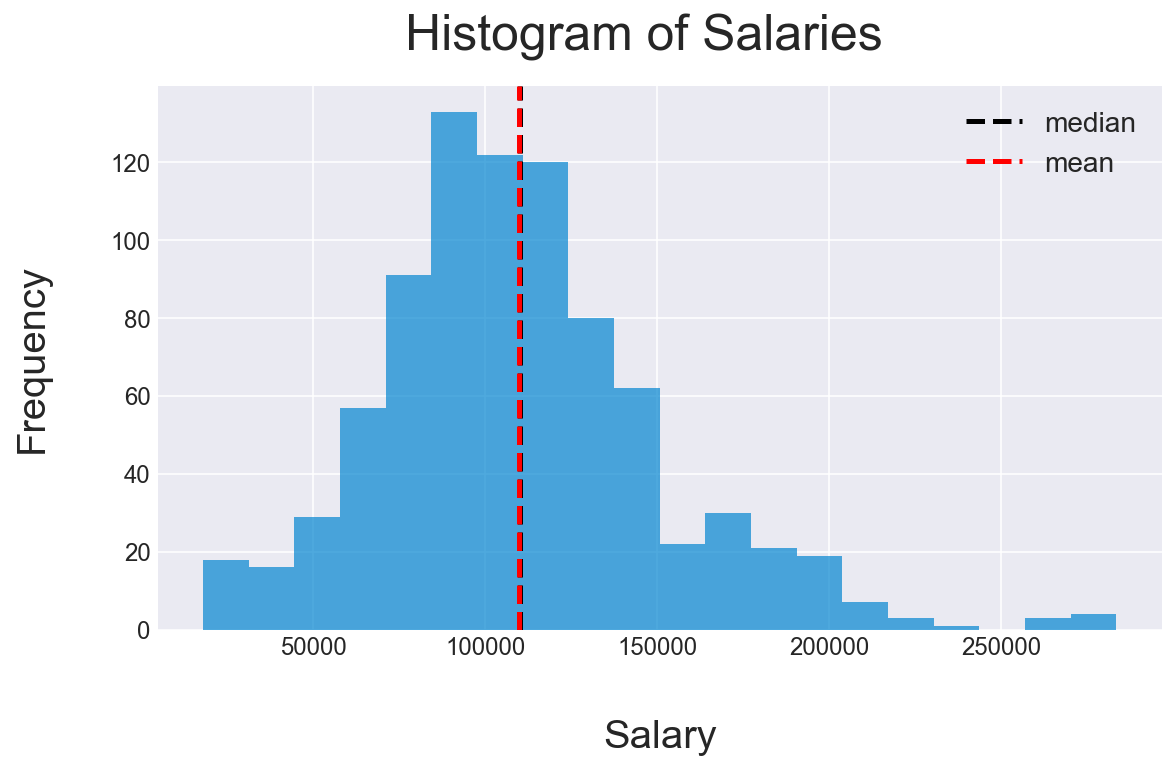

In [42]:
# Create a histogram of salary data.
sns.set_style('darkgrid')     # Use seaborn style darkgrid.
fig = plt.figure(figsize=(9,5))
ax = sns.distplot(salaries.salary, bins=20, kde=False, hist_kws={'color': '#0485d1', 'alpha': 0.7})
# Seaborn distribution plot, kde=False to make it a histogram with frequency on the y axis.
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Frequency', fontsize=20,  labelpad=30)   # labelpad creates a space between the axis and axis label
plt.xlabel('Salary', fontsize=20, labelpad=30)
plt.suptitle('Histogram of Salaries', fontsize=25)  
# Create vertical lines to show median and mean of salary data.
plt.axvline(salaries.salary.median(), lw=2.5, ls='dashed', color='black', label='median')
plt.axvline(salaries.salary.mean(), lw=2.5, ls='dashed', color='red', label='mean')

plt.legend(loc=1, prop={'size': 14})

plt.show()

---
Plotting a histogram of the salary data shows that the distribution is mostly symetrical with a slight positive skew from the few very high salaries. However, despite this skew, the mean and the median are roughly the same.
<br>My model to predict the salaries will be a simple binary model to predict high vs low salaries. Because of this distribution, I can split my data on the mean salary.
<br>The mean salary of the jobs that I scraped is around \$110,000 which is significantly higher than the average Australian salaray of around \$80,000.

---

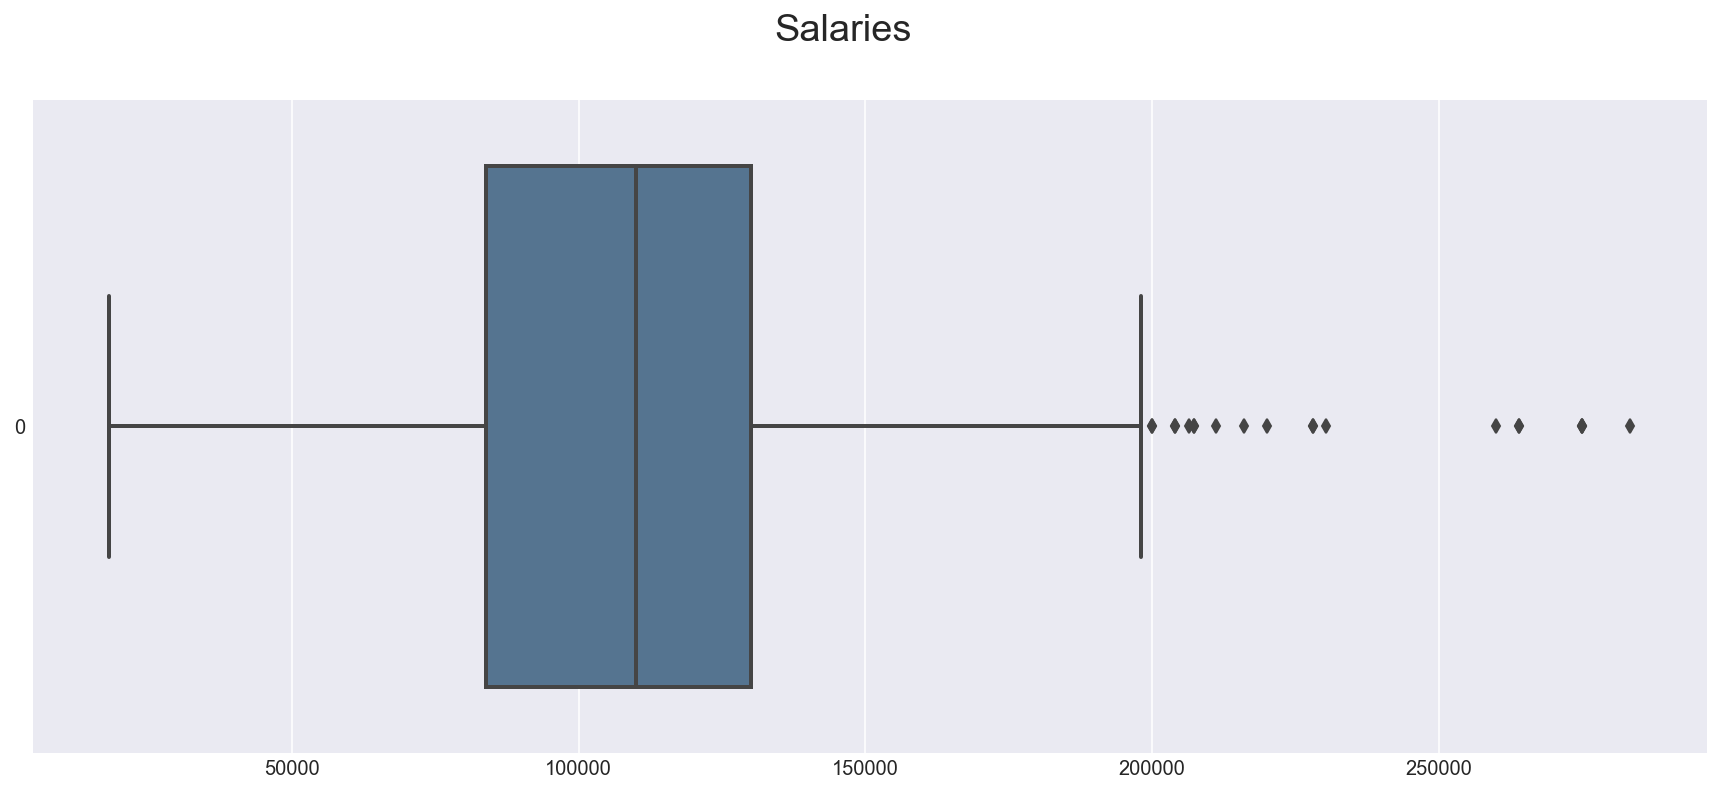

In [43]:
# Create a box plot of salary data.
sns.set_style("darkgrid")
fig = plt.figure(1, figsize=(15,6))
ax = sns.boxplot(data=salaries.salary, orient='h', fliersize=5, 
                 linewidth=2, notch=False, saturation=0.7, color='#49759c')
plt.suptitle('Salaries', fontsize=19)
plt.show()

---
The boxplot shows that there are a number of outliers. However, as previously stated, I will not be removing these outliers because the presence of very high paying jobs is not anomalous and is to be expected. The outliers are for salaries above \$200,000. Sorting the dataframe by salary will allow me to investigate these 'outliers'. 

---

In [44]:
salaries.salary_type.value_counts()

year    653
day      81
hour     75
week     29
Name: salary_type, dtype: int64

In [45]:
salaries[salaries.salary>200000].sort_values('salary', ascending=False)  # Sort salaries above 200k (outliers).

,location,title,company,salary,salary_type,summary,description
749,brisbane,organisational change manager servicenow 1...,hudson,283440.0,day,provide strategic direction and leadership for...,initial contract until 30 june 2018 with possi...
20,sydney,small cap equities research analyst industrials,fulsearch,275000.0,year,proven ability to critically review and analys...,small cap equities research analyst industri...
106,sydney,small cap equities research analyst industrials,fulsearch,275000.0,year,small cap equities research analyst industri...,small cap equities research analyst industri...
619,melbourne,head of big data,fourquarters,275000.0,year,head of big data required to build and manage ...,head of big data required to build and manage ...
754,sydney,data engineer,hudson,264000.0,day,solid experience structured and unstructured b...,data engineer 6 month contract 1100 per day...
751,sydney,snr data engineer ml ai spark etl elt proces...,silk recruitment,264000.0,day,we are looking for very talented senior data e...,snr data engineer machine learning ai spark ...
25,sydney,head of analytics banking,algorithmic trading strategies pty ltd,260000.0,year,data science and quant skills this role would...,outstanding opportunity to be a part of a fina...
818,brisbane,sap data migration contract,davidson,230400.0,hour,work with the functional team data analysts a...,contract through till end of april 2019 large...
747,brisbane,deployment lead,hudson,228000.0,day,evidence of strong business engagement skills ...,global application deployment contract through...
716,brisbane,deployment lead,hudson,228000.0,day,good communication and prior experience of dat...,global application deployment contract through...


---
The outliers are all above \$200,000. Looking at these values, there are quite a few jobs that were on an hourly or daily salary type. It is likely that these are contract jobs which probably have a higher hourly rate than annual salaries. I have already taken into account holidays and included a 4 week holiday period when scaling the non-annual salaries. These salaries would have been higher otherwise.

---

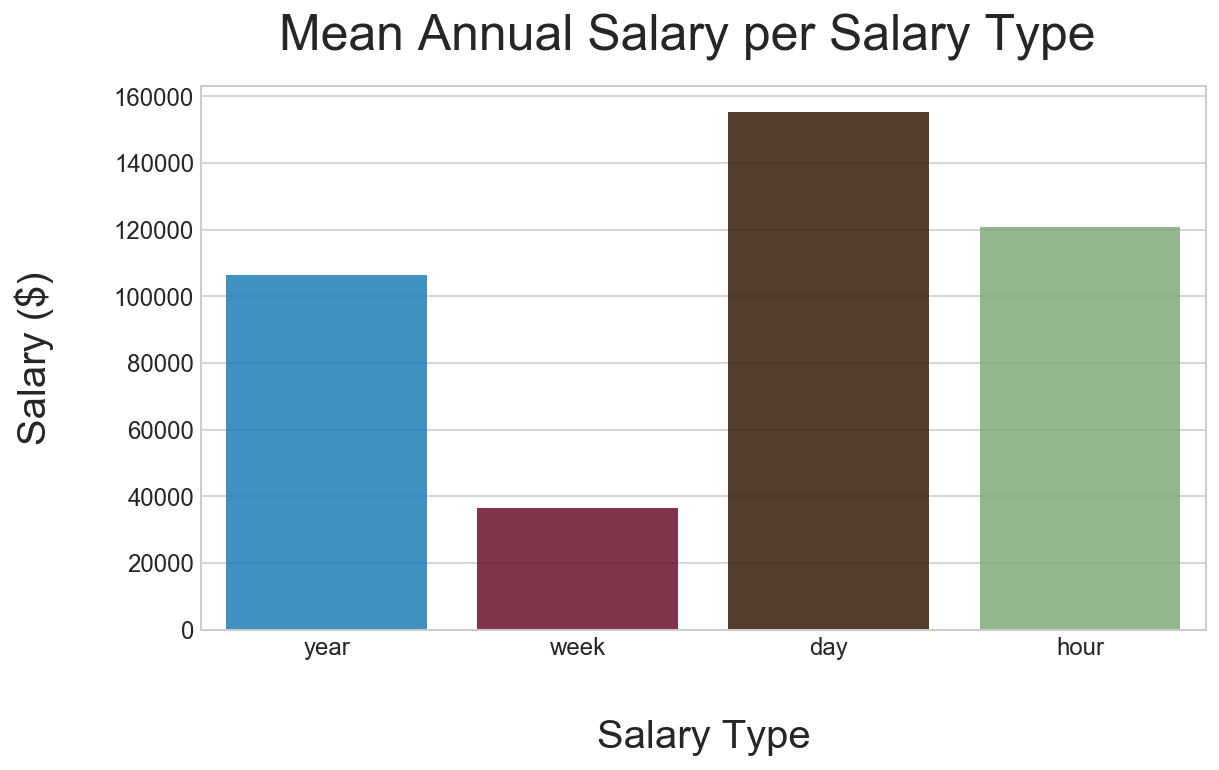

In [46]:
# Create a bar chart of mean annual salary per salary type.
sns.set_style('whitegrid')
fig = plt.figure(1, figsize = (9, 5))
colours = ['#0485d1','#7b0323','#3d1c02','#7bb274']
ax = sns.barplot(x = "salary_type", y = "salary", data = salaries, palette=colours, ci = None, estimator=np.mean, 
                 alpha=0.85)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Salary ($)', fontsize=20,  labelpad=30)
plt.xlabel('Salary Type', fontsize=20, labelpad=30)
plt.suptitle('Mean Annual Salary per Salary Type', fontsize=25)  
plt.show()

---
Plotting a bar chart of the mean annual salary per salary type shows that daily salary types have the highest annual rate, followed by hourly. Therefore, it is likely that these daily and hourly salaries are for contract jobs. Weekly salary type has by far the lowest mean annual salary of just under \$40,000 which is well below the mean annual salary for Australia.

---

In [47]:
salaries[salaries.salary_type == 'week'].sort_values('salary', ascending=True)

,location,title,company,salary,salary_type,summary,description
669,sydney,senior finance business analyst,morgan mckinley,25200.0,week,identifying benefits and risks of business cas...,6 month contract for senior finance ba with fm...
655,sydney,data analyst human services,ethos beathchapman,26400.0,week,this opportunity would also suit a data analys...,ashfield location 2 positions available 550 s...
679,sydney,data analyst human services,ethos beathchapman,26400.0,week,to be successful in this role you must have a ...,ashfield location 2 positions available 550 s...
654,melbourne,indigenous cadetship data61 cyber security risk,csiro,28320.0,week,the work will involve mathematics programming...,improve your professional employment prospects...
662,sydney,business analyst,interactiveinc recruitment,28800.0,week,business analysis experience we are looking f...,we are looking for a talented ba to work on a ...
676,brisbane,2 x business analysts ba consultants,genesis it t pty ltd,30000.0,week,we are looking to hire 2 x business analysts ...,3 month contract possible extensions great b...
678,perth,2 x digital business analysts ba mobility cons...,genesis it t pty ltd,30000.0,week,we are looking to hire 2 x business analysts ...,3 month contract possible extensions great p...
674,melbourne,net developer tester,profusion group,30720.0,week,working in a dynamic team of multiple front en...,company overview profusion is working with a...
657,sydney,business analyst techone,hays,31200.0,week,experience migrating large scale data from leg...,your new company large organisation in the pr...
661,sydney,business analyst remediation 600 to 700p...,profusion group,31200.0,week,detailed knowledge of business analysis tasks ...,company overview working for a top tiered fin...


---
Looking at the jobs with weekly salary type, there are a number of senior roles. This suggests that these listings are for part-time jobs as senior business analysts and finance analysts would not have an annual salary that is less than half the national average salary.

---

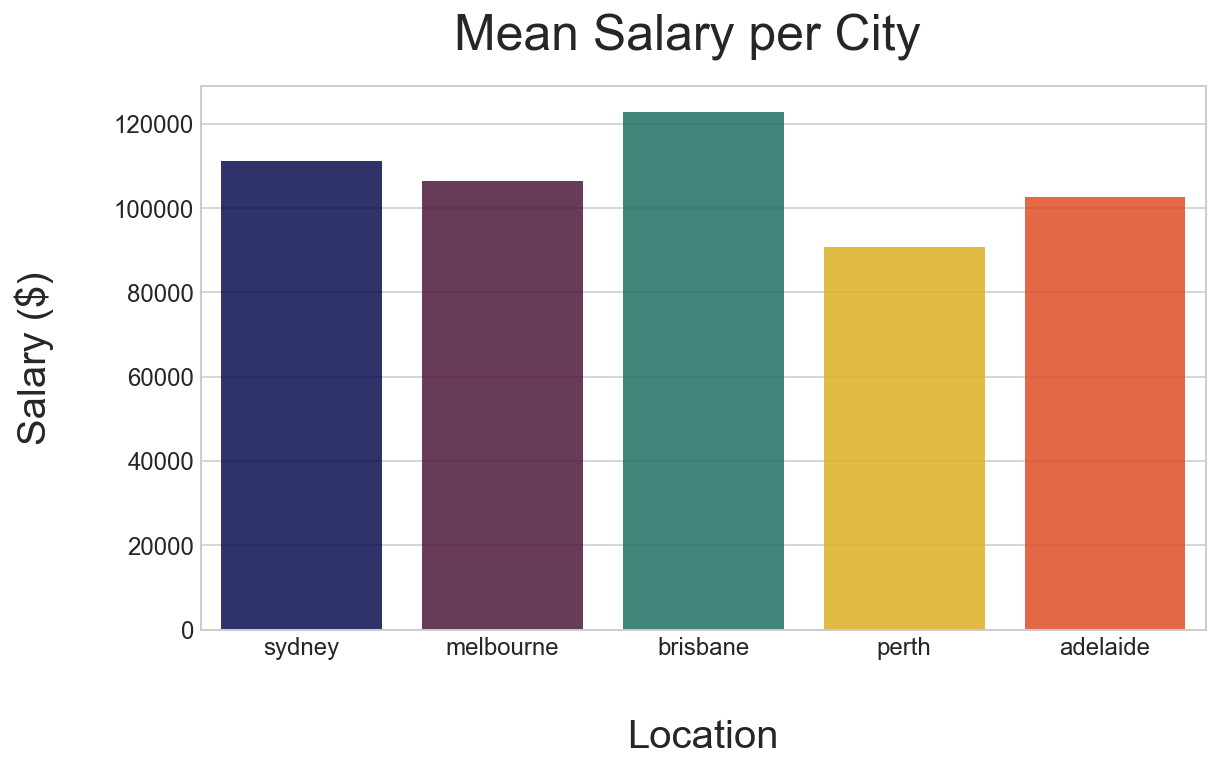

In [48]:
# Create a bar chart of mean annual salary per city.
sns.set_style('whitegrid')
fig = plt.figure(1, figsize = (9, 5))
colours = ['#00035b','#580f41','#137e6d','#fac205','#fd3c06']
ax = sns.barplot(x = "location", y = "salary", data = salaries, palette=colours, ci = None, estimator = np.mean,
                 alpha=0.85)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Salary ($)', fontsize=20,  labelpad=30)
plt.xlabel('Location', fontsize=20, labelpad=30)
plt.suptitle('Mean Salary per City', fontsize=25)  
plt.show()

---
Plotting a bar chart of mean salary for each location shows that Brisbane has the highest mean salary, whereas Perth has the lowest.

---

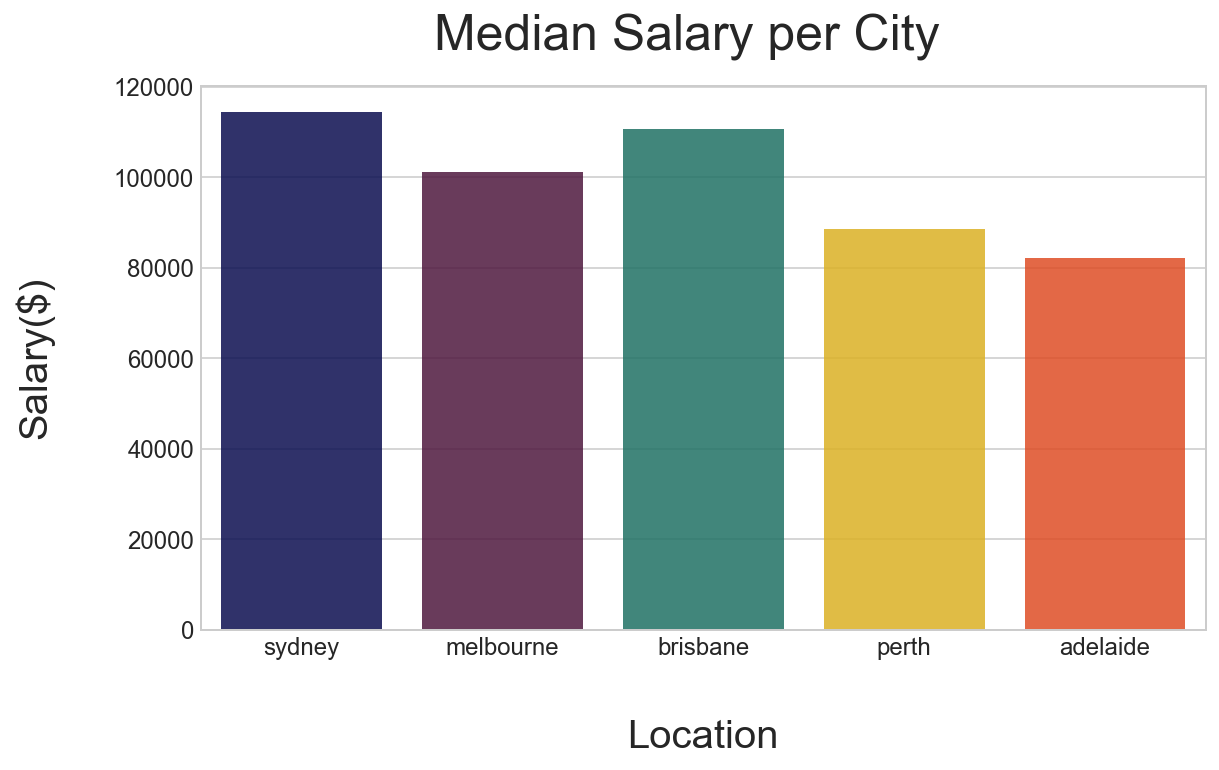

In [49]:
#Create a bar chart of median annual salary per city.
sns.set_style('whitegrid')
fig = plt.figure(1, figsize = (9, 5))
colours = ['#00035b','#580f41','#137e6d','#fac205','#fd3c06']
ax = sns.barplot(x = "location", y = "salary", data = salaries, palette=colours, ci = None, estimator=np.median, 
                 alpha=0.85)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Salary($)', fontsize=20,  labelpad=30)
plt.xlabel('Location', fontsize=20, labelpad=30)
plt.suptitle('Median Salary per City', fontsize=25)  
plt.show()

---
Plotting the medians shows similar results except Adelaide is now lower than Perth.

---

I will now groupby location and salary type to see the proportion of each salary type per city.

---

In [50]:
city_sal_type = salaries.groupby(['location', 'salary_type']).count()   # Groupby location and salary_type, aggregation is count.

In [51]:
city_sal_type   # View groupby.

title  company  salary  summary  description
location  salary_type                                              
adelaide  hour             4        4       4        4            4
          year             8        8       8        8            8
brisbane  day              9        9       9        9            9
          hour            29       29      29       29           29
          week             2        2       2        2            2
          year            55       55      55       55           55
melbourne day             29       29      29       29           29
          hour            13       13      13       13           13
          week             9        9       9        9            9
          year           245      245     245      245          245
perth     day              1        1       1        1            1
          hour             3        3       3        3            3
          week             1        1       1        1            1
          year            30       30      30       30           30
sydney    day             42       42      42       42           42
          hour            26       26      26       26           26
          week            17       17      17       17           17
          year           315      315     315      315          315

In [52]:
city_sal_type['count'] = city_sal_type['title']   # All columns list same count so add another column called count.

In [53]:
city_sal_type.drop(['title', 'company', 'salary', 'summary', 'description'], axis=1, inplace=True)  # Remove all other columns

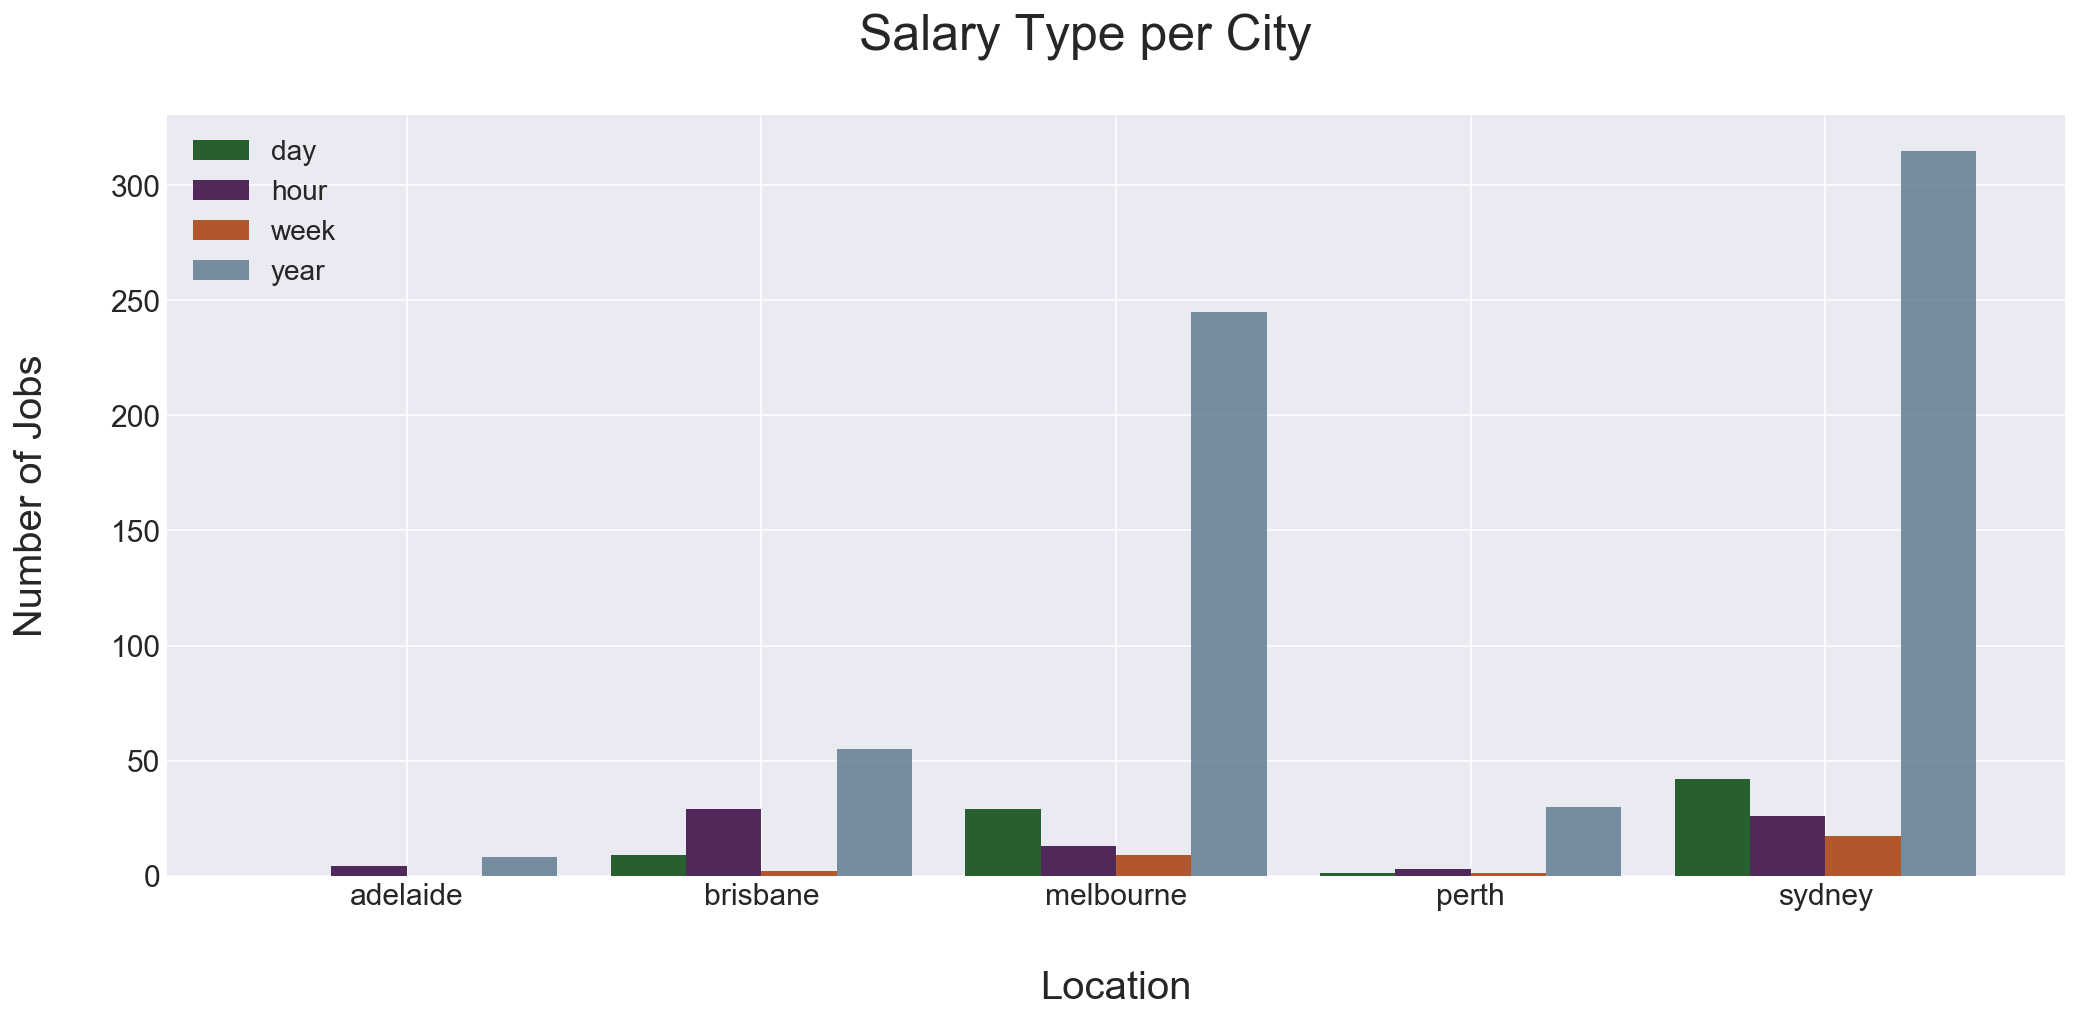

In [66]:
# Create a bar chart to show counts of salary type per city.
sns.set_style('darkgrid')
city_sal_type.unstack().plot(kind='bar', figsize=(17,7), color = ['#06470c', '#35063e', '#a83c09', '#607c8e'],
                             alpha=0.85, width=0.85)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=0)    # Rotate x-axis labels to be horizontal.
plt.suptitle('Salary Type per City', fontsize=25)
plt.ylabel('Number of Jobs', fontsize=20,  labelpad=30)
plt.xlabel('Location', fontsize=20, labelpad=30)
plt.legend(loc=2, prop={'size': 14}, labels=['day', 'hour', 'week', 'year']) # Create labels for the legend.
plt.show()

---
The previous plots of mean and median annual salary per city shows that Brisbane has the highest mean annual salary but not the highest median. Plotting the mean annual salary per salary type showed that daily and hourly rates have the highest annual mean salary. The above plot of salary type per city shows that Brisbane has a high proportion of jobs with daily and hourly salary types. This explains why Brisbane had the highest mean annual salary but not the highest median annual salary.

---

I have now finished the EDA. I can now move onto modelling the data. The first model will predict salary.

[End of EDA (2). See file(3) for Modelling Part 1.]